<a href="https://colab.research.google.com/github/minyoung347/python101/blob/main/1_4_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파일 임포트 및 폰트 설정
- github에서 연수자료 임포트
- apt-get install -y fonts-nanum으로 나눔폰트 설치

In [1]:
!rm -r python101/
!git clone https://github.com/minyoung347/python101.git

rm: cannot remove 'python101/': No such file or directory
Cloning into 'python101'...
remote: Enumerating objects: 861, done.
remote: Counting objects: 100% (861/861), done.
remote: Compressing objects: 100% (436/436), done.
remote: Total 861 (delta 445), reused 811 (delta 421), pack-reused 0
Receiving objects: 100% (861/861), 92.79 MiB | 13.33 MiB/s, done.
Resolving deltas: 100% (445/445), done.
Updating files: 100% (63/63), done.


In [2]:
!apt-get -y install fonts-nanum

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,313 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 121913 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


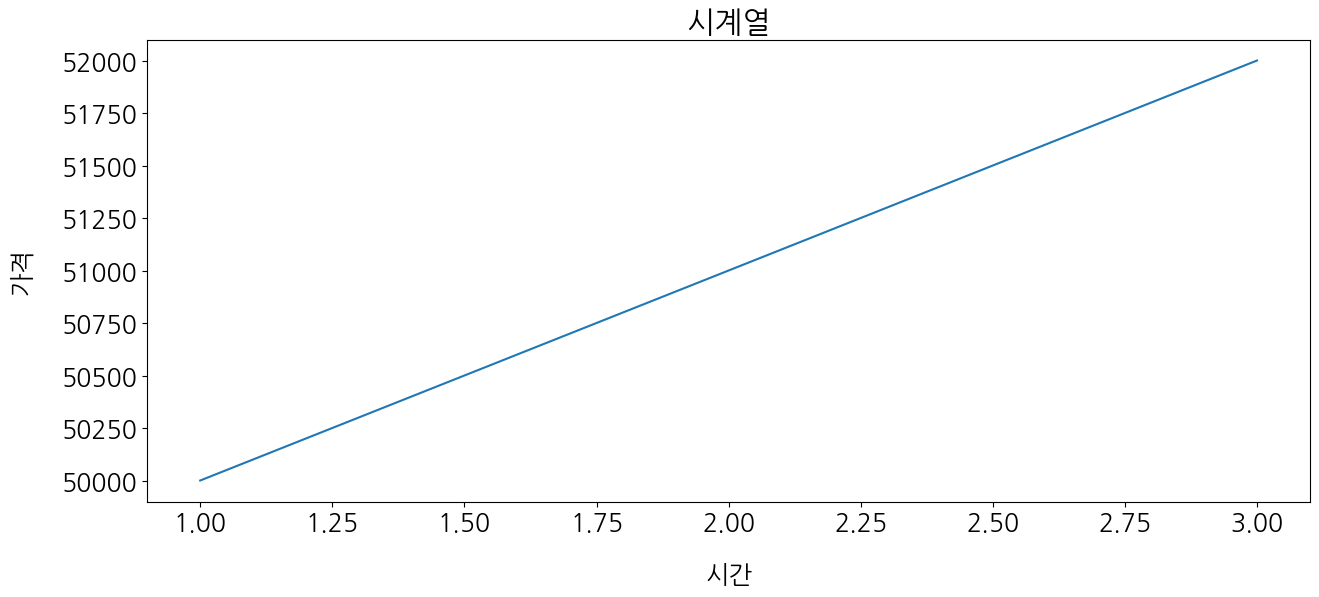

In [3]:
# 필요 라이브러리 불러오기
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

# 테스트 해보기
fig, ax = plt.subplots(1, 1, figsize=(15, 6))

graph_title = '시계열'
ax.set_title(f'{graph_title}')
ax.set_xlabel('시간', labelpad=20)
ax.set_ylabel('가격', labelpad=20)

ax.plot([1, 2, 3], [50000, 51000, 52000])

plt.show()

# BIS

- visit BIS webpage (https://www.bis.org/statistics/dsr.htm?m=6_380_671)
- download Debt service ratios (whole data set) xlsx file

DSR 엑셀파일 구조
- Quarterly Series시트 입수
- 첫 3개 행을 제외 (그 다음 첫번째 행은 컬럼으로 자동 지정)
- 첫번째 열을 인덱스로 지정

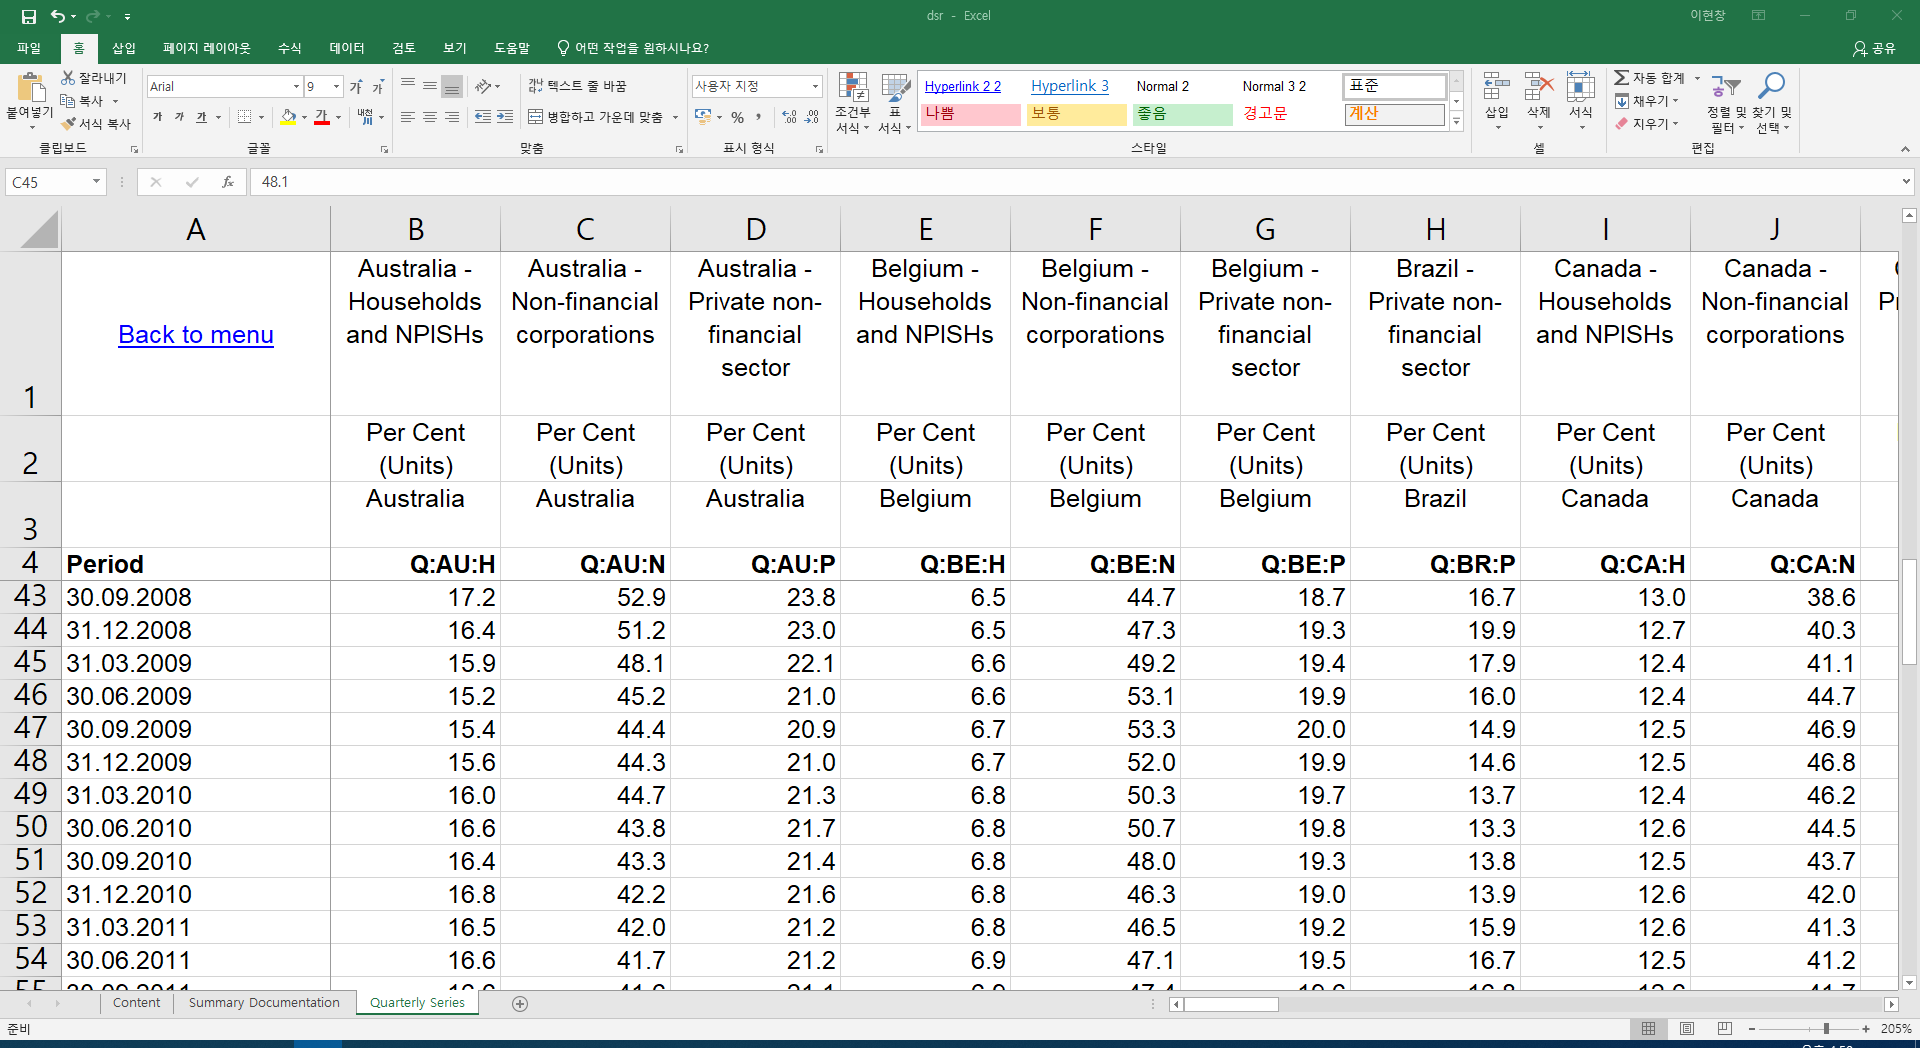

In [ ]:
from IPython.display import Image
Image('python101/input/dsr_xlsx.png', width=1000)

DSR 엑셀파일 다운로드
- Quarterly Series시트 입수 (sheet_name='Quarterly Series')
- 첫 3개 행을 제외 (그 다음 첫번째 행은 컬럼으로 자동 지정) (skiprows=3)
- 첫번째 열을 인덱스로 지정 (index_col=0)

In [4]:
import pandas as pd

In [5]:
df = pd.read_excel('python101/input/dsr.xlsx',sheet_name='Quarterly Series', skiprows=3, index_col=0)

In [6]:
df.head()

Q:AU:H  Q:AU:N  Q:AU:P  Q:BE:H  Q:BE:N  Q:BE:P  Q:BR:P  Q:CA:H  \
Period                                                                       
1999-03-31    10.0    44.7    16.4     6.1    37.5    13.9    40.1    10.6   
1999-06-30    10.1    43.9    16.3     6.0    38.8    14.2    32.9    10.5   
1999-09-30    10.3    44.6    16.5     6.0    40.8    15.0    27.2    10.5   
1999-12-31    10.5    45.3    16.9     6.0    41.9    15.4    24.2    10.5   
2000-03-31    10.9    46.2    17.4     6.0    42.5    15.7    19.2    10.7   

            Q:CA:N  Q:CA:P  ...  Q:RU:P  Q:SE:H  Q:SE:N  Q:SE:P  Q:TH:P  \
Period                      ...                                           
1999-03-31    56.5    21.1  ...    14.8     8.9    31.6    18.3    23.3   
1999-06-30    54.7    20.7  ...    11.4     8.9    29.3    17.0    21.0   
1999-09-30    52.6    20.3  ...    10.0     8.9    29.8    17.2    18.8   
1999-12-31    50.3    19.8  ...     9.1     9.0    30.2    17.6    17.2   
2000-03-31    50.5    20.5  ...     7.6     9.0    31.6    18.4    16.3   

            Q:TR:P  Q:US:H  Q:US:N  Q:US:P  Q:ZA:P  
Period                                              
1999-03-31     NaN     9.4    42.3    16.0    12.1  
1999-06-30     NaN     9.5    42.6    16.2    11.9  
1999-09-30     NaN     9.6    43.3    16.5    11.3  
1999-12-31     NaN     9.7    43.9    16.7    10.7  
2000-03-31     NaN     9.8    44.7    17.0    10.0  

[5 rows x 66 columns]

데이터 구조 설정

- 각 칼럼 라벨을 ':'으로 나누어 멀티인덱스로 지정 df.columns.str.split(':').tolist()
- 칼럼 첫번째 레벨은 모두 분기를 나타내는 Q이므로 제거


In [7]:
df.columns.str.split(':').tolist()

[['Q', 'AU', 'H'],
 ['Q', 'AU', 'N'],
 ['Q', 'AU', 'P'],
 ['Q', 'BE', 'H'],
 ['Q', 'BE', 'N'],
 ['Q', 'BE', 'P'],
 ['Q', 'BR', 'P'],
 ['Q', 'CA', 'H'],
 ['Q', 'CA', 'N'],
 ['Q', 'CA', 'P'],
 ['Q', 'CH', 'P'],
 ['Q', 'CN', 'P'],
 ['Q', 'CZ', 'P'],
 ['Q', 'DE', 'H'],
 ['Q', 'DE', 'N'],
 ['Q', 'DE', 'P'],
 ['Q', 'DK', 'H'],
 ['Q', 'DK', 'N'],
 ['Q', 'DK', 'P'],
 ['Q', 'ES', 'H'],
 ['Q', 'ES', 'N'],
 ['Q', 'ES', 'P'],
 ['Q', 'FI', 'H'],
 ['Q', 'FI', 'N'],
 ['Q', 'FI', 'P'],
 ['Q', 'FR', 'H'],
 ['Q', 'FR', 'N'],
 ['Q', 'FR', 'P'],
 ['Q', 'GB', 'H'],
 ['Q', 'GB', 'N'],
 ['Q', 'GB', 'P'],
 ['Q', 'HK', 'P'],
 ['Q', 'HU', 'P'],
 ['Q', 'ID', 'P'],
 ['Q', 'IN', 'P'],
 ['Q', 'IT', 'H'],
 ['Q', 'IT', 'N'],
 ['Q', 'IT', 'P'],
 ['Q', 'JP', 'H'],
 ['Q', 'JP', 'N'],
 ['Q', 'JP', 'P'],
 ['Q', 'KR', 'H'],
 ['Q', 'KR', 'N'],
 ['Q', 'KR', 'P'],
 ['Q', 'MX', 'P'],
 ['Q', 'MY', 'P'],
 ['Q', 'NL', 'H'],
 ['Q', 'NL', 'N'],
 ['Q', 'NL', 'P'],
 ['Q', 'NO', 'H'],
 ['Q', 'NO', 'N'],
 ['Q', 'NO', 'P'],
 ['Q', 'PL',

In [8]:
df.columns = pd.MultiIndex.from_tuples(df.columns.str.split(':').tolist())

In [9]:
df

Q                                                       ...  \
              AU               BE                BR    CA              ...   
               H     N     P    H     N     P     P     H     N     P  ...   
Period                                                                 ...   
1999-03-31  10.0  44.7  16.4  6.1  37.5  13.9  40.1  10.6  56.5  21.1  ...   
1999-06-30  10.1  43.9  16.3  6.0  38.8  14.2  32.9  10.5  54.7  20.7  ...   
1999-09-30  10.3  44.6  16.5  6.0  40.8  15.0  27.2  10.5  52.6  20.3  ...   
1999-12-31  10.5  45.3  16.9  6.0  41.9  15.4  24.2  10.5  50.3  19.8  ...   
2000-03-31  10.9  46.2  17.4  6.0  42.5  15.7  19.2  10.7  50.5  20.5  ...   
...          ...   ...   ...  ...   ...   ...   ...   ...   ...   ...  ...   
2019-03-31  15.7  44.6  20.8  7.2  50.8  20.4  17.5  13.2  55.8  24.1  ...   
2019-06-30  15.7  43.5  20.7  7.2  49.6  20.1  17.9  13.3  55.7  24.0  ...   
2019-09-30  15.3  42.4  20.1  7.2  49.9  20.2  17.9  13.3  56.3  24.1  ...   
2019-12-31  14.9  41.0  19.7  7.2  49.4  20.1  17.5  13.3  56.2  24.1  ...   
2020-03-31  14.8  41.4  19.7  7.2  49.9  20.1  17.3  13.1  57.7  24.2  ...   

                                                                       
              RU    SE                TH    TR   US                ZA  
               P     H     N     P     P     P    H     N     P     P  
Period                                                                 
1999-03-31  14.8   8.9  31.6  18.3  23.3   NaN  9.4  42.3  16.0  12.1  
1999-06-30  11.4   8.9  29.3  17.0  21.0   NaN  9.5  42.6  16.2  11.9  
1999-09-30  10.0   8.9  29.8  17.2  18.8   NaN  9.6  43.3  16.5  11.3  
1999-12-31   9.1   9.0  30.2  17.6  17.2   NaN  9.7  43.9  16.7  10.7  
2000-03-31   7.6   9.0  31.6  18.4  16.3   NaN  9.8  44.7  17.0  10.0  
...          ...   ...   ...   ...   ...   ...  ...   ...   ...   ...  
2019-03-31  12.2  11.5  47.7  23.7   9.8  21.8  7.8  42.3  14.8   9.3  
2019-06-30  12.1  11.5  47.1  23.6   9.8  22.6  7.8  42.6  14.8   9.1  
2019-09-30  11.9  11.5  47.8  23.8   9.8  18.0  7.8  42.7  14.9   9.2  
2019-12-31  11.4  11.5  49.1  24.0   9.8  13.9  7.8  42.6  14.8   9.0  
2020-03-31  11.8  11.6  49.6  24.1   9.9  12.8  7.8  43.8  15.0   9.2  

[85 rows x 66 columns]

In [10]:
df.columns.get_level_values(0).unique()

Index(['Q'], dtype='object')

In [11]:
df.columns.get_level_values(1).unique()

Index(['AU', 'BE', 'BR', 'CA', 'CH', 'CN', 'CZ', 'DE', 'DK', 'ES', 'FI', 'FR',
       'GB', 'HK', 'HU', 'ID', 'IN', 'IT', 'JP', 'KR', 'MX', 'MY', 'NL', 'NO',
       'PL', 'PT', 'RU', 'SE', 'TH', 'TR', 'US', 'ZA'],
      dtype='object')

In [12]:
df.columns.get_level_values(2).unique()

Index(['H', 'N', 'P'], dtype='object')

In [13]:
df = df['Q']  # or df.droplevel(0, axis=1)

In [14]:
df

AU               BE                BR    CA              ...  \
               H     N     P    H     N     P     P     H     N     P  ...   
Period                                                                 ...   
1999-03-31  10.0  44.7  16.4  6.1  37.5  13.9  40.1  10.6  56.5  21.1  ...   
1999-06-30  10.1  43.9  16.3  6.0  38.8  14.2  32.9  10.5  54.7  20.7  ...   
1999-09-30  10.3  44.6  16.5  6.0  40.8  15.0  27.2  10.5  52.6  20.3  ...   
1999-12-31  10.5  45.3  16.9  6.0  41.9  15.4  24.2  10.5  50.3  19.8  ...   
2000-03-31  10.9  46.2  17.4  6.0  42.5  15.7  19.2  10.7  50.5  20.5  ...   
...          ...   ...   ...  ...   ...   ...   ...   ...   ...   ...  ...   
2019-03-31  15.7  44.6  20.8  7.2  50.8  20.4  17.5  13.2  55.8  24.1  ...   
2019-06-30  15.7  43.5  20.7  7.2  49.6  20.1  17.9  13.3  55.7  24.0  ...   
2019-09-30  15.3  42.4  20.1  7.2  49.9  20.2  17.9  13.3  56.3  24.1  ...   
2019-12-31  14.9  41.0  19.7  7.2  49.4  20.1  17.5  13.3  56.2  24.1  ...   
2020-03-31  14.8  41.4  19.7  7.2  49.9  20.1  17.3  13.1  57.7  24.2  ...   

              RU    SE                TH    TR   US                ZA  
               P     H     N     P     P     P    H     N     P     P  
Period                                                                 
1999-03-31  14.8   8.9  31.6  18.3  23.3   NaN  9.4  42.3  16.0  12.1  
1999-06-30  11.4   8.9  29.3  17.0  21.0   NaN  9.5  42.6  16.2  11.9  
1999-09-30  10.0   8.9  29.8  17.2  18.8   NaN  9.6  43.3  16.5  11.3  
1999-12-31   9.1   9.0  30.2  17.6  17.2   NaN  9.7  43.9  16.7  10.7  
2000-03-31   7.6   9.0  31.6  18.4  16.3   NaN  9.8  44.7  17.0  10.0  
...          ...   ...   ...   ...   ...   ...  ...   ...   ...   ...  
2019-03-31  12.2  11.5  47.7  23.7   9.8  21.8  7.8  42.3  14.8   9.3  
2019-06-30  12.1  11.5  47.1  23.6   9.8  22.6  7.8  42.6  14.8   9.1  
2019-09-30  11.9  11.5  47.8  23.8   9.8  18.0  7.8  42.7  14.9   9.2  
2019-12-31  11.4  11.5  49.1  24.0   9.8  13.9  7.8  42.6  14.8   9.0  
2020-03-31  11.8  11.6  49.6  24.1   9.9  12.8  7.8  43.8  15.0   9.2  

[85 rows x 66 columns]

각 부문(민간, 비금융기업, 가계)에 대한 국가별 DSR 수준을 확인하기 쉽도록 칼럼 레벨 순서를 변경

- df.reorder_levels()

In [15]:
df.reorder_levels([1, 0], axis = 1)

H     N     P    H     N     P           H     N     P  ...  \
              AU    AU    AU   BE    BE    BE    BR    CA    CA    CA  ...   
Period                                                                 ...   
1999-03-31  10.0  44.7  16.4  6.1  37.5  13.9  40.1  10.6  56.5  21.1  ...   
1999-06-30  10.1  43.9  16.3  6.0  38.8  14.2  32.9  10.5  54.7  20.7  ...   
1999-09-30  10.3  44.6  16.5  6.0  40.8  15.0  27.2  10.5  52.6  20.3  ...   
1999-12-31  10.5  45.3  16.9  6.0  41.9  15.4  24.2  10.5  50.3  19.8  ...   
2000-03-31  10.9  46.2  17.4  6.0  42.5  15.7  19.2  10.7  50.5  20.5  ...   
...          ...   ...   ...  ...   ...   ...   ...   ...   ...   ...  ...   
2019-03-31  15.7  44.6  20.8  7.2  50.8  20.4  17.5  13.2  55.8  24.1  ...   
2019-06-30  15.7  43.5  20.7  7.2  49.6  20.1  17.9  13.3  55.7  24.0  ...   
2019-09-30  15.3  42.4  20.1  7.2  49.9  20.2  17.9  13.3  56.3  24.1  ...   
2019-12-31  14.9  41.0  19.7  7.2  49.4  20.1  17.5  13.3  56.2  24.1  ...   
2020-03-31  14.8  41.4  19.7  7.2  49.9  20.1  17.3  13.1  57.7  24.2  ...   

                     H     N     P                H     N     P        
              RU    SE    SE    SE    TH    TR   US    US    US    ZA  
Period                                                                 
1999-03-31  14.8   8.9  31.6  18.3  23.3   NaN  9.4  42.3  16.0  12.1  
1999-06-30  11.4   8.9  29.3  17.0  21.0   NaN  9.5  42.6  16.2  11.9  
1999-09-30  10.0   8.9  29.8  17.2  18.8   NaN  9.6  43.3  16.5  11.3  
1999-12-31   9.1   9.0  30.2  17.6  17.2   NaN  9.7  43.9  16.7  10.7  
2000-03-31   7.6   9.0  31.6  18.4  16.3   NaN  9.8  44.7  17.0  10.0  
...          ...   ...   ...   ...   ...   ...  ...   ...   ...   ...  
2019-03-31  12.2  11.5  47.7  23.7   9.8  21.8  7.8  42.3  14.8   9.3  
2019-06-30  12.1  11.5  47.1  23.6   9.8  22.6  7.8  42.6  14.8   9.1  
2019-09-30  11.9  11.5  47.8  23.8   9.8  18.0  7.8  42.7  14.9   9.2  
2019-12-31  11.4  11.5  49.1  24.0   9.8  13.9  7.8  42.6  14.8   9.0  
2020-03-31  11.8  11.6  49.6  24.1   9.9  12.8  7.8  43.8  15.0   9.2  

[85 rows x 66 columns]

칼럼을 부문 - 국가 순서로 정렬 sort_index(axis=1)

In [16]:
df.reorder_levels([1, 0], axis = 1).sort_index(axis=1)

H                                                 ...     P  \
              AU   BE    CA   DE    DK   ES   FI   FR   GB   IT  ...    NL   
Period                                                           ...         
1999-03-31  10.0  6.1  10.6  9.5  17.8  6.1  4.6  4.7  8.8  3.0  ...  23.5   
1999-06-30  10.1  6.0  10.5  9.6  17.2  5.4  4.6  4.8  8.6  2.9  ...  23.7   
1999-09-30  10.3  6.0  10.5  9.6  16.7  5.4  4.6  4.8  8.6  2.9  ...  24.1   
1999-12-31  10.5  6.0  10.5  9.6  17.7  6.1  4.7  4.8  8.9  3.2  ...  24.5   
2000-03-31  10.9  6.0  10.7  9.8  17.0  5.6  4.7  4.8  9.0  3.2  ...  24.5   
...          ...  ...   ...  ...   ...  ...  ...  ...  ...  ...  ...   ...   
2019-03-31  15.7  7.2  13.2  6.1  15.0  6.2  7.1  6.3  8.9  4.3  ...  26.1   
2019-06-30  15.7  7.2  13.3  6.1  14.9  6.2  7.1  6.3  8.9  4.2  ...  26.1   
2019-09-30  15.3  7.2  13.3  6.1  14.8  6.1  7.1  6.3  9.0  4.2  ...  26.1   
2019-12-31  14.9  7.2  13.3  6.1  14.6  6.1  7.1  6.4  9.0  4.2  ...  25.9   
2020-03-31  14.8  7.2  13.1  6.1  14.4  5.9  7.2  6.4  9.0  4.2  ...  25.8   

                                                                 
              NO   PL    PT    RU    SE    TH    TR    US    ZA  
Period                                                           
1999-03-31  23.6  8.2  14.0  14.8  18.3  23.3   NaN  16.0  12.1  
1999-06-30  23.5  7.9  14.1  11.4  17.0  21.0   NaN  16.2  11.9  
1999-09-30  23.2  7.9  14.0  10.0  17.2  18.8   NaN  16.5  11.3  
1999-12-31  23.1  7.9  14.1   9.1  17.6  17.2   NaN  16.7  10.7  
2000-03-31  22.9  8.0  14.3   7.6  18.4  16.3   NaN  17.0  10.0  
...          ...  ...   ...   ...   ...   ...   ...   ...   ...  
2019-03-31  25.9  7.0  14.6  12.2  23.7   9.8  21.8  14.8   9.3  
2019-06-30  26.4  6.9  14.5  12.1  23.6   9.8  22.6  14.8   9.1  
2019-09-30  27.0  6.9  14.3  11.9  23.8   9.8  18.0  14.9   9.2  
2019-12-31  27.3  6.8  14.1  11.4  24.0   9.8  13.9  14.8   9.0  
2020-03-31  27.9  7.0  14.1  11.8  24.1   9.9  12.8  15.0   9.2  

[85 rows x 66 columns]

데이터 자료형을 확인

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85 entries, 1999-03-31 to 2020-03-31
Data columns (total 66 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   (AU, H)  85 non-null     float64
 1   (AU, N)  85 non-null     float64
 2   (AU, P)  85 non-null     float64
 3   (BE, H)  85 non-null     float64
 4   (BE, N)  85 non-null     float64
 5   (BE, P)  85 non-null     float64
 6   (BR, P)  85 non-null     float64
 7   (CA, H)  85 non-null     float64
 8   (CA, N)  85 non-null     float64
 9   (CA, P)  85 non-null     float64
 10  (CH, P)  85 non-null     float64
 11  (CN, P)  85 non-null     float64
 12  (CZ, P)  85 non-null     float64
 13  (DE, H)  85 non-null     float64
 14  (DE, N)  85 non-null     float64
 15  (DE, P)  85 non-null     float64
 16  (DK, H)  85 non-null     float64
 17  (DK, N)  85 non-null     float64
 18  (DK, P)  85 non-null     float64
 19  (ES, H)  85 non-null     float64
 20  (ES, N)  85 non-null     float64
 21

In [18]:
df.tail()

AU               BE                BR    CA              ...  \
               H     N     P    H     N     P     P     H     N     P  ...   
Period                                                                 ...   
2019-03-31  15.7  44.6  20.8  7.2  50.8  20.4  17.5  13.2  55.8  24.1  ...   
2019-06-30  15.7  43.5  20.7  7.2  49.6  20.1  17.9  13.3  55.7  24.0  ...   
2019-09-30  15.3  42.4  20.1  7.2  49.9  20.2  17.9  13.3  56.3  24.1  ...   
2019-12-31  14.9  41.0  19.7  7.2  49.4  20.1  17.5  13.3  56.2  24.1  ...   
2020-03-31  14.8  41.4  19.7  7.2  49.9  20.1  17.3  13.1  57.7  24.2  ...   

              RU    SE               TH    TR   US               ZA  
               P     H     N     P    P     P    H     N     P    P  
Period                                                               
2019-03-31  12.2  11.5  47.7  23.7  9.8  21.8  7.8  42.3  14.8  9.3  
2019-06-30  12.1  11.5  47.1  23.6  9.8  22.6  7.8  42.6  14.8  9.1  
2019-09-30  11.9  11.5  47.8  23.8  9.8  18.0  7.8  42.7  14.9  9.2  
2019-12-31  11.4  11.5  49.1  24.0  9.8  13.9  7.8  42.6  14.8  9.0  
2020-03-31  11.8  11.6  49.6  24.1  9.9  12.8  7.8  43.8  15.0  9.2  

[5 rows x 66 columns]

그래프 그리기

- 한국의 부문별 DSR 추이
- 한국, 미국, 영국의 가계부문 DSR 추이 (idx = pd.IndexSlice 이용)
- 2010년 이후 추이 (.loc['2010':, ])

In [19]:
df

AU               BE                BR    CA              ...  \
               H     N     P    H     N     P     P     H     N     P  ...   
Period                                                                 ...   
1999-03-31  10.0  44.7  16.4  6.1  37.5  13.9  40.1  10.6  56.5  21.1  ...   
1999-06-30  10.1  43.9  16.3  6.0  38.8  14.2  32.9  10.5  54.7  20.7  ...   
1999-09-30  10.3  44.6  16.5  6.0  40.8  15.0  27.2  10.5  52.6  20.3  ...   
1999-12-31  10.5  45.3  16.9  6.0  41.9  15.4  24.2  10.5  50.3  19.8  ...   
2000-03-31  10.9  46.2  17.4  6.0  42.5  15.7  19.2  10.7  50.5  20.5  ...   
...          ...   ...   ...  ...   ...   ...   ...   ...   ...   ...  ...   
2019-03-31  15.7  44.6  20.8  7.2  50.8  20.4  17.5  13.2  55.8  24.1  ...   
2019-06-30  15.7  43.5  20.7  7.2  49.6  20.1  17.9  13.3  55.7  24.0  ...   
2019-09-30  15.3  42.4  20.1  7.2  49.9  20.2  17.9  13.3  56.3  24.1  ...   
2019-12-31  14.9  41.0  19.7  7.2  49.4  20.1  17.5  13.3  56.2  24.1  ...   
2020-03-31  14.8  41.4  19.7  7.2  49.9  20.1  17.3  13.1  57.7  24.2  ...   

              RU    SE                TH    TR   US                ZA  
               P     H     N     P     P     P    H     N     P     P  
Period                                                                 
1999-03-31  14.8   8.9  31.6  18.3  23.3   NaN  9.4  42.3  16.0  12.1  
1999-06-30  11.4   8.9  29.3  17.0  21.0   NaN  9.5  42.6  16.2  11.9  
1999-09-30  10.0   8.9  29.8  17.2  18.8   NaN  9.6  43.3  16.5  11.3  
1999-12-31   9.1   9.0  30.2  17.6  17.2   NaN  9.7  43.9  16.7  10.7  
2000-03-31   7.6   9.0  31.6  18.4  16.3   NaN  9.8  44.7  17.0  10.0  
...          ...   ...   ...   ...   ...   ...  ...   ...   ...   ...  
2019-03-31  12.2  11.5  47.7  23.7   9.8  21.8  7.8  42.3  14.8   9.3  
2019-06-30  12.1  11.5  47.1  23.6   9.8  22.6  7.8  42.6  14.8   9.1  
2019-09-30  11.9  11.5  47.8  23.8   9.8  18.0  7.8  42.7  14.9   9.2  
2019-12-31  11.4  11.5  49.1  24.0   9.8  13.9  7.8  42.6  14.8   9.0  
2020-03-31  11.8  11.6  49.6  24.1   9.9  12.8  7.8  43.8  15.0   9.2  

[85 rows x 66 columns]

<Axes: xlabel='Period'>

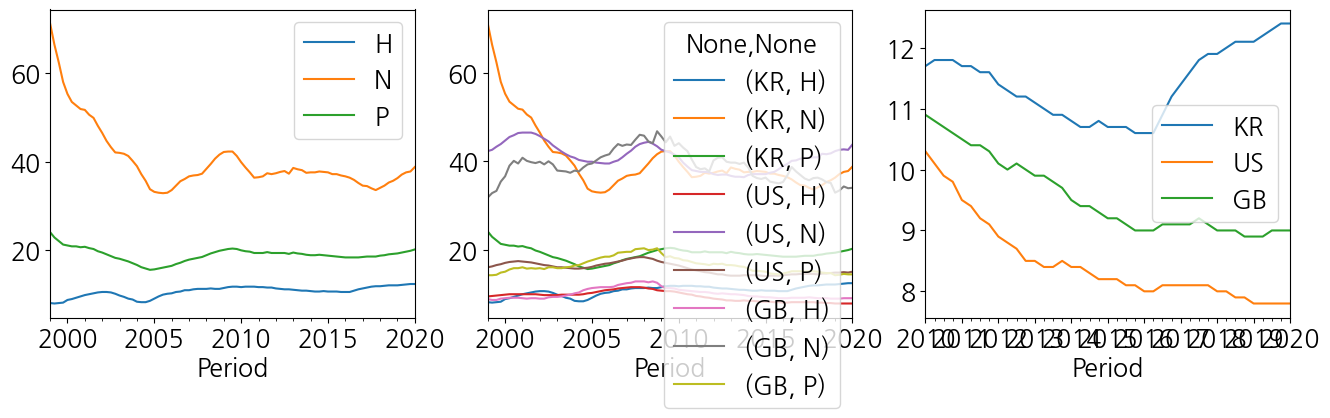

In [20]:
fig, ax = plt.subplots(1, 3, figsize = (16, 4))


df['KR'].plot(ax = ax[0])
df.loc[:, ['KR', 'US', 'GB']].plot(ax = ax[1])
df.reorder_levels([1, 0], axis = 1)['H'].loc['2010':, ['KR', 'US', 'GB']].plot(ax = ax[2])

그래프 꾸미기
- python2021/script 폴더에서 RGB 값들이 리스트로 저장된 colors.py 파일 실행
    - lcolors, bcolors
- 색 지정, 범례, 그리드, 타이틀, 마커 등

In [21]:
%run python101/script/colors.py

<Figure size 640x480 with 0 Axes>

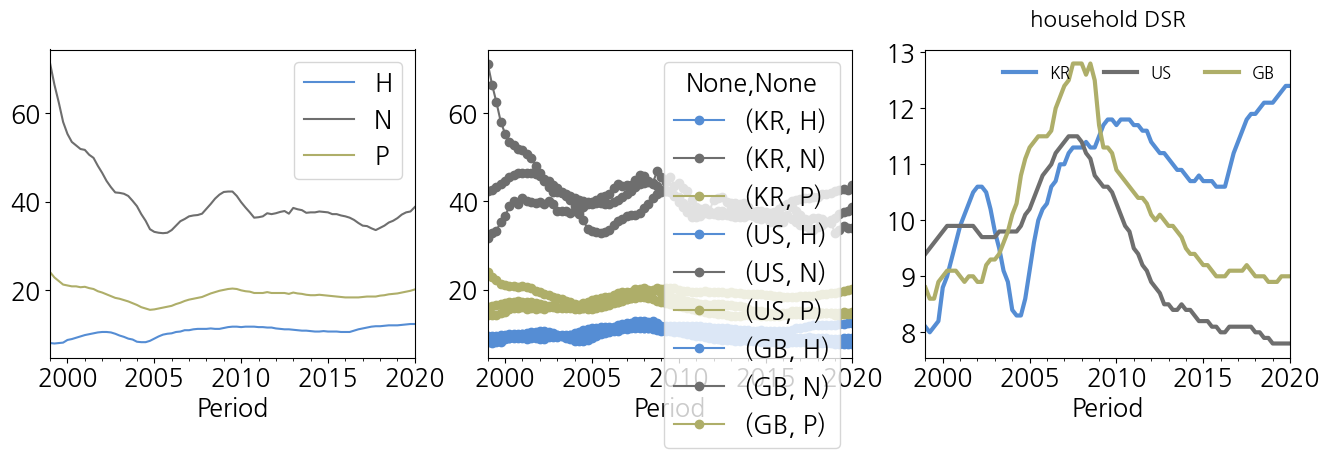

In [22]:
fig, ax = plt.subplots(1, 3, figsize = (16, 4))


df['KR'].plot(ax = ax[0], color=lcolors[:3])
df.loc[:, ['KR', 'US', 'GB']].plot(ax = ax[1], color=lcolors[:3], marker='o')
df.reorder_levels([1, 0], axis = 1)['H'].loc[:, ['KR', 'US', 'GB']].plot(ax = ax[2], lw=3, color=lcolors[:3])

ax[2].legend(ncol=3, frameon=False, fontsize=12)
ax[2].set_title('household DSR', fontsize=16, y=1.05);

연도별 그래프 그리기

- 평균, 연말, moving average

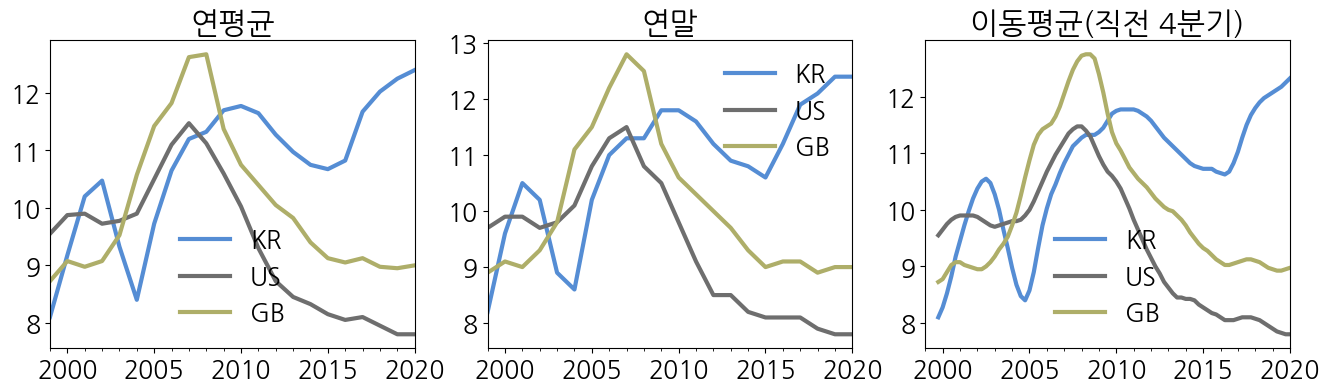

In [23]:
fig, ax = plt.subplots(1, 3, figsize = (16, 4))

df_h = df.reorder_levels([1, 0], axis = 1)['H'].loc[:, ['KR', 'US', 'GB']]
df_h.index.names = [None]

df_h.resample('A').mean().plot(ax = ax[0], lw=3, color=lcolors[:3])
df_h.resample('A').last().plot(ax = ax[1], lw=3, color=lcolors[:3])
df_h.rolling(4, center=False).mean().plot(ax = ax[2], lw=3, color=lcolors[:3])

for i, t in enumerate(['연평균', '연말', '이동평균(직전 4분기)']):
    ax[i].set_title(t)
    ax[i].legend(frameon=False)


# 한국부동산원

- 웹페이지 https://www.reb.or.kr/r-one/main.do

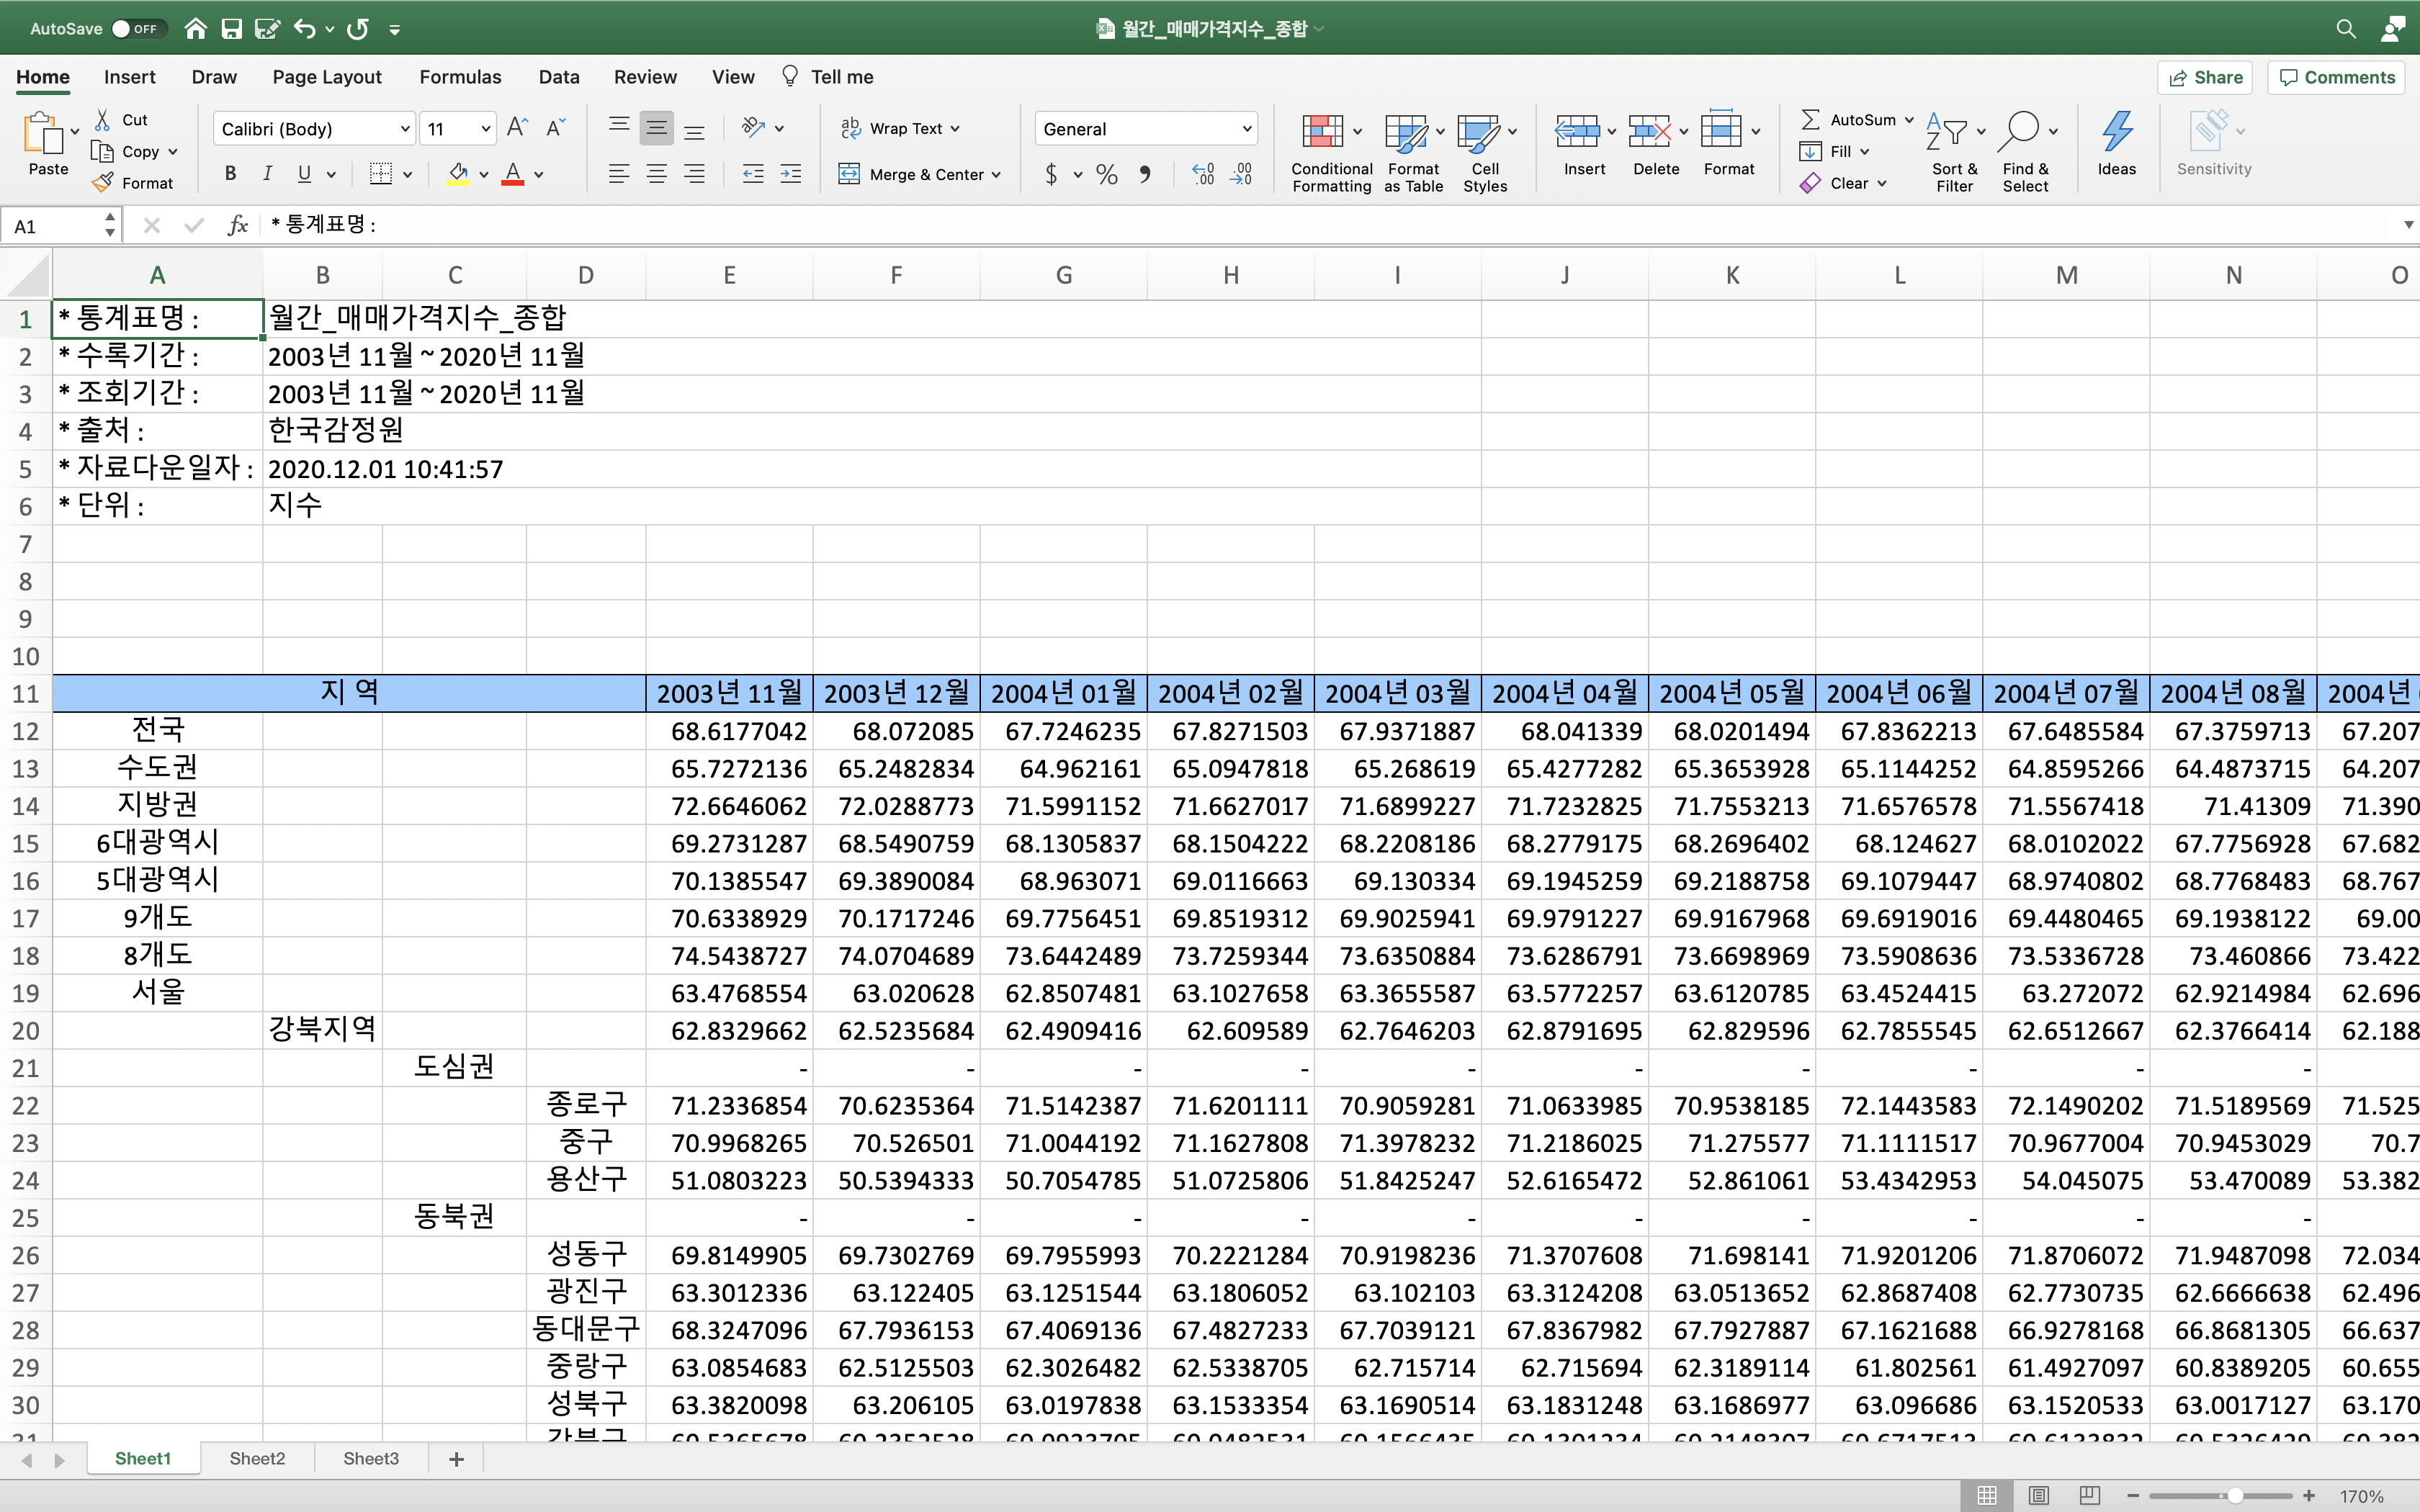

In [24]:
from IPython.display import Image

Image('python101/input/reb_xlsx.png', width=1000)

데이터 입수
- Sheet1 시트 입수
- 첫 10개 행 제외

In [99]:
df = pd.read_excel('python101/input/reb.xlsx', sheet_name='Sheet1', skiprows=10)

In [100]:
df.head(15)

지 역 Unnamed: 1 Unnamed: 2 Unnamed: 3  2003년 11월  2003년 12월  2004년 01월  \
0      전국        NaN        NaN        NaN  68.617704  68.072085  67.724623   
1     수도권        NaN        NaN        NaN  65.727214  65.248283  64.962161   
2     지방권        NaN        NaN        NaN  72.664606  72.028877  71.599115   
3   6대광역시        NaN        NaN        NaN  69.273129  68.549076  68.130584   
4   5대광역시        NaN        NaN        NaN  70.138555  69.389008  68.963071   
5     9개도        NaN        NaN        NaN  70.633893  70.171725  69.775645   
6     8개도        NaN        NaN        NaN  74.543873  74.070469  73.644249   
7      서울        NaN        NaN        NaN  63.476855  63.020628  62.850748   
8     NaN       강북지역        NaN        NaN  62.832966  62.523568  62.490942   
9     NaN        NaN        도심권        NaN          -          -          -   
10    NaN        NaN        NaN        종로구  71.233685  70.623536  71.514239   
11    NaN        NaN        NaN         중구  70.996826  70.526501  71.004419   
12    NaN        NaN        NaN        용산구  51.080322  50.539433  50.705478   
13    NaN        NaN        동북권        NaN          -          -          -   
14    NaN        NaN        NaN        성동구   69.81499  69.730277  69.795599   

    2004년 02월  2004년 03월  2004년 04월  ...   2020년 02월   2020년 03월   2020년 04월  \
0    67.82715  67.937189  68.041339  ...  101.473629  102.023739   102.30141   
1   65.094782  65.268619  65.427728  ...  104.983763  105.956932  106.500467   
2   71.662702  71.689923  71.723282  ...   98.389117   98.577374   98.628994   
3   68.150422  68.220819  68.277917  ...  101.690027  102.269215  102.594644   
4   69.011666  69.130334  69.194526  ...  101.627626  101.892867  101.995889   
5   69.851931  69.902594  69.979123  ...   99.118383    99.72377  100.047827   
6   73.725934  73.635088  73.628679  ...    96.18769   96.245469   96.235305   
7   63.102766  63.365559  63.577226  ...  108.708096  108.851816  108.830591   
8   62.609589   62.76462  62.879169  ...  108.001469   108.24648  108.337449   
9           -          -          -  ...  110.436115  110.611923  110.628382   
10  71.620111  70.905928  71.063398  ...  107.970593  108.111761  108.114876   
11  71.162781  71.397823  71.218603  ...  110.116264  110.273141  110.272297   
12  51.072581  51.842525  52.616547  ...  112.204631  112.413636  112.448035   
13          -          -          -  ...  107.204965  107.467349  107.598248   
14  70.222128  70.919824  71.370761  ...  111.050113  111.223881   111.24962   

     2020년 05월   2020년 06월   2020년 07월   2020년 08월   2020년 09월   2020년 10월  \
0   102.439549  102.860048  103.490924  103.980226  104.419841  104.751838   
1   106.767341  107.295471  108.162637  108.730402  109.200187  109.523817   
2     98.65803     98.9871   99.418084   99.840749  100.254391  100.592939   
3   102.783843  103.290726  103.756154  104.155578  104.705335   105.19987   
4   102.061216   102.48142  102.938144  103.395693  104.038408  104.611825   
5   100.225083  100.662886  101.269683  101.719912  102.105058  102.390931   
6     96.23606   96.470969   96.783379    97.03524   97.236312   97.407282   
7   108.737396  108.878312  109.655113  110.119263  110.419274  110.596536   
8   108.327749  108.454405  109.226095  109.739937  110.092041  110.316839   
9   110.601511  110.729517  111.241389  111.632766  111.935565  112.115223   
10  108.097703  108.195238  108.594719  108.901425  109.177365  109.371423   
11  110.254646  110.344727  110.901292  111.305166    111.6058  111.805501   
12   112.40985  112.577962  113.143497  113.586179  113.908261  114.067667   
13  107.601146  107.742891  108.620493  109.179799  109.540068  109.771939   
14  111.236855   111.41967  112.259961  112.857274  113.179043  113.387066   

     2020년 11월  
0   105.315058  
1   110.064184  
2   101.174575  
3   106.121624  
4   105.671593  
5   102.889564  
6    97.689147  
7    110.78195  
8   110.545971  
9   112.328064  
10  109.588901  
11  112

지역 이름 정리
- 전국, 수도권, 지방권, 6대광역시, 5대광역시, 9개도, 8개도, 서울, 서울-강북지역, 서울-도심권, 서울-종로구, ... 등
- '지역' 라벨을 아래 방향으로 채움 df.iloc[:, 0].fillna(method='ffill', axis=0)
- 첫 4개 칼럼의 NaN을 빈 문자열로 대체 df.iloc[:, 0:4].fillna('')
- 첫 4개 칼럼을 '-'으로 결함하여 새로운 칼럼 생성 df.iloc[:, 0:4].agg('-'.join, axis=1)
- '지역1-지역2' 유형 이외의 '-' 제거

In [101]:
df.iloc[:, 0] = df.iloc[:, 0].fillna(method = 'ffill', axis = 0)

In [102]:
df.iloc[:, 0:4] = df.iloc[:, 0:4].fillna('')

In [103]:
df

지 역 Unnamed: 1 Unnamed: 2 Unnamed: 3   2003년 11월   2003년 12월  \
0       전국                                    68.617704   68.072085   
1      수도권                                    65.727214   65.248283   
2      지방권                                    72.664606   72.028877   
3    6대광역시                                    69.273129   68.549076   
4    5대광역시                                    70.138555   69.389008   
..     ...        ...        ...        ...         ...         ...   
223     경남        거제시                         49.338324   51.335809   
224     경남        양산시                         71.000725   69.899066   
225     제주                                    98.494929   98.452457   
226     제주        제주시                        101.135734  101.092122   
227     제주       서귀포시                                 -           -   

     2004년 01월  2004년 02월  2004년 03월  2004년 04월  ...   2020년 02월   2020년 03월  \
0    67.724623   67.82715  67.937189  68.041339  ...  101.473629  102.023739   
1    64.962161  65.094782  65.268619  65.427728  ...  104.983763  105.956932   
2    71.599115  71.662702  71.689923  71.723282  ...   98.389117   98.577374   
3    68.130584  68.150422  68.220819  68.277917  ...  101.690027  102.269215   
4    68.963071  69.011666  69.130334  69.194526  ...  101.627626  101.892867   
..         ...        ...        ...        ...  ...         ...         ...   
223  50.926889  52.829644  53.710648  53.616574  ...   82.516557   82.439693   
224  69.618905  69.500128  69.674401  69.868392  ...   95.785761   95.601377   
225  93.789393  91.836958   87.98395  87.386914  ...   97.749726   97.501271   
226  96.304034  94.299252  90.342939  89.729895  ...   97.346351   97.108594   
227          -          -          -          -  ...   98.762408   98.487946   

      2020년 04월   2020년 05월   2020년 06월   2020년 07월   2020년 08월   2020년 09월  \
0     102.30141  102.439549  102.860048  103.490924  103.980226  104.419841   
1    106.500467  106.767341  107.295471  108.162637  108.730402  109.200187   
2     98.628994    98.65803     98.9871   99.418084   99.840749  100.254391   
3    102.594644  102.783843  103.290726  103.756154  104.155578  104.705335   
4    101.995889  102.061216   102.48142  102.938144  103.395693  104.038408   
..          ...         ...         ...         ...         ...         ...   
223   82.359544   82.218803   82.189345   82.790701   83.074988   83.178192   
224   95.460383   95.372065   95.286078   95.184425   94.868434   94.803575   
225   97.215558   96.941172    96.71273   96.572757   96.477005   96.392664   
226   96.845631   96.584617   96.380495   96.255999   96.179247    96.12884   
227    98.14704   97.840192   97.552848   97.375416   97.233733   97.067474   

      2020년 10월   2020년 11월  
0    104.751838  105.315058  
1    109.523817  110.064184  
2    100.592939  101.174575  
3     105.19987  106.121624  
4    104.611825  105.671593  
..          ...         ...  
223   83.191118   82.942282  
224   94.933949   95.118865  
225   96.284012   96.224416  
226    96.05557   96.004039  
227   96.873497   96.794455  

[228 rows x 209 columns]

In [104]:
df['R'] = df.iloc[:, 0:4].agg('-'.join, axis=1)

In [105]:
df['R'] = df['R'].str.rstrip('-')

In [106]:
df['R'] = df['R'].str.replace('---', '-').str.replace('--', '-')

In [107]:
df['R'].unique()

array(['전국', '수도권', '지방권', '6대광역시', '5대광역시', '9개도', '8개도', '서울',
       '서울-강북지역', '서울-도심권', '서울-종로구', '서울-중구', '서울-용산구', '서울-동북권',
       '서울-성동구', '서울-광진구', '서울-동대문구', '서울-중랑구', '서울-성북구', '서울-강북구',
       '서울-도봉구', '서울-노원구', '서울-서북권', '서울-은평구', '서울-서대문구', '서울-마포구',
       '서울-강남지역', '서울-서남권', '서울-양천구', '서울-강서구', '서울-구로구', '서울-금천구',
       '서울-영등포구', '서울-동작구', '서울-관악구', '서울-동남권', '서울-서초구', '서울-강남구',
       '서울-송파구', '서울-강동구', '경기', '경기-경부1권', '경기-과천시', '경기-안양시', '경기-만안구',
       '경기-동안구', '경기-성남시', '경기-수정구', '경기-중원구', '경기-분당구', '경기-군포시',
       '경기-의왕시', '경기-경부2권', '경기-안성시', '경기-용인시', '경기-처인구', '경기-기흥구',
       '경기-수지구', '경기-수원시', '경기-장안구', '경기-권선구', '경기-팔달구', '경기-영통구',
       '경기-서해안권', '경기-부천시', '경기-안산시', '경기-상록구', '경기-단원구', '경기-시흥시',
       '경기-광명시', '경기-화성시', '경기-오산시', '경기-평택시', '경기-동부1권', '경기-남양주시',
       '경기-구리시', '경기-하남시', '경기-광주시', '경기-동부2권', '경기-이천시', '경기-여주시',
       '경기-경의권', '경기-김포시', '경기-고양시', '경기-덕양구', '경기-일산동구', '경기-일산서구',
       '경기-파주시', '경기-경원권', '경기-포천시', '경기-동두천시'

In [108]:
df.columns

Index(['지 역', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', '2003년 11월',
       '2003년 12월', '2004년 01월', '2004년 02월', '2004년 03월', '2004년 04월',
       ...
       '2020년 03월', '2020년 04월', '2020년 05월', '2020년 06월', '2020년 07월',
       '2020년 08월', '2020년 09월', '2020년 10월', '2020년 11월', 'R'],
      dtype='object', length=210)

자주 사용하는 지역 리스트 만들기

In [109]:
m6 = ['부산', '대구', '인천', '광주', '대전', '울산']
p8 = ['강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주']
sma = ['서울', '경기', '인천']
nsm = ['부산', '대구', '광주', '대전', '울산', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주', '세종']
a4 = ['전국', '수도권', '6대광역시', '8개도']

r17_long = ['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시',
            '대전광역시', '부산광역시', '서울특별시', '세종특별자치시', '울산광역시',
            '인천광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도']
r17_short = ['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산',
             '서울', '세종', '울산', '인천', '전남', '전북', '제주', '충남', '충북']
r17_en = ['GW', 'GG', 'GN', 'GB', 'GJ', 'DG', 'DJ', 'BS',
          'SE', 'SJ', 'US', 'IC', 'JN', 'JB', 'JJ', 'CN', 'CB']
r17_long2short = dict(zip(r17_long, r17_short))
r17_kr2en = dict(zip(r17_short, r17_en))

새로운 지역 이름(R)을 인덱스로 지정하고 기존 지역 이름 칼럼 제거

In [110]:
df = df.set_index('R')

In [111]:
df = df.iloc[:, 4:]

칼럼 라벨을 데이트타임인덱스로 변환하고, 시간x변수명 구조를 갖도록 transpose
- '년 ' -> '-'
- '월' -> '' (빈문자열)
- df.columns = pd.to_datetime(df.columns)
- df = df.T

In [112]:
df.head(1)

2003년 11월  2003년 12월  2004년 01월 2004년 02월  2004년 03월  2004년 04월  \
R                                                                     
전국  68.617704  68.072085  67.724623  67.82715  67.937189  68.041339   

    2004년 05월  2004년 06월  2004년 07월  2004년 08월  ...   2020년 02월   2020년 03월  \
R                                               ...                           
전국  68.020149  67.836221  67.648558  67.375971  ...  101.473629  102.023739   

    2020년 04월   2020년 05월   2020년 06월   2020년 07월   2020년 08월   2020년 09월  \
R                                                                           
전국  102.30141  102.439549  102.860048  103.490924  103.980226  104.419841   

     2020년 10월   2020년 11월  
R                           
전국  104.751838  105.315058  

[1 rows x 205 columns]

In [113]:
df.columns = df.columns.str.replace('년 ', '-')

In [114]:
df.columns = df.columns.str.replace('월', '')

In [115]:
df.columns = pd.to_datetime(df.columns)

In [116]:
df = df.T

데이터프레임 자료형이 정수나 실수인지 확인
- int, float
- str
- object

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 205 entries, 2003-11-01 to 2020-11-01
Columns: 228 entries, 전국 to 제주-서귀포시
dtypes: object(228)
memory usage: 366.8+ KB


In [118]:
df

R                   전국         수도권         지방권       6대광역시       5대광역시  \
2003-11-01   68.617704   65.727214   72.664606   69.273129   70.138555   
2003-12-01   68.072085   65.248283   72.028877   68.549076   69.389008   
2004-01-01   67.724623   64.962161   71.599115   68.130584   68.963071   
2004-02-01    67.82715   65.094782   71.662702   68.150422   69.011666   
2004-03-01   67.937189   65.268619   71.689923   68.220819   69.130334   
...                ...         ...         ...         ...         ...   
2020-07-01  103.490924  108.162637   99.418084  103.756154  102.938144   
2020-08-01  103.980226  108.730402   99.840749  104.155578  103.395693   
2020-09-01  104.419841  109.200187  100.254391  104.705335  104.038408   
2020-10-01  104.751838  109.523817  100.592939   105.19987  104.611825   
2020-11-01  105.315058  110.064184  101.174575  106.121624  105.671593   

R                  9개도        8개도          서울     서울-강북지역      서울-도심권  ...  \
2003-11-01   70.633893  74.543873   63.476855   62.832966           -  ...   
2003-12-01   70.171725  74.070469   63.020628   62.523568           -  ...   
2004-01-01   69.775645  73.644249   62.850748   62.490942           -  ...   
2004-02-01   69.851931  73.725934   63.102766   62.609589           -  ...   
2004-03-01   69.902594  73.635088   63.365559    62.76462           -  ...   
...                ...        ...         ...         ...         ...  ...   
2020-07-01  101.269683  96.783379  109.655113  109.226095  111.241389  ...   
2020-08-01  101.719912   97.03524  110.119263  109.739937  111.632766  ...   
2020-09-01  102.105058  97.236312  110.419274  110.092041  111.935565  ...   
2020-10-01  102.390931  97.407282  110.596536  110.316839  112.115223  ...   
2020-11-01  102.889564  97.689147   110.78195  110.545971  112.328064  ...   

R              경남-진주시     경남-통영시     경남-사천시     경남-김해시      경남-밀양시     경남-거제시  \
2003-11-01  76.320188          -          -  70.198215           -  49.338324   
2003-12-01  76.572567          -          -  70.338107           -  51.335809   
2004-01-01  76.178095          -          -  70.529537           -  50.926889   
2004-02-01  76.678682          -          -  70.401127           -  52.829644   
2004-03-01  77.220733          -          -  70.738761           -  53.710648   
...               ...        ...        ...        ...         ...        ...   
2020-07-01  94.623397  94.830763  95.484947  88.136157  102.190338  82.790701   
2020-08-01  94.791177   94.95663  95.395162  88.079918  102.181017  83.074988   
2020-09-01   94.92982  95.123666  95.309113  87.950815  102.086712  83.178192   
2020-10-01  95.177515  95.211612  95.244409  87.790224  101.989613  83.191118   
2020-11-01  95.399112  95.071661  95.176443  87.607468  101.886261  82.942282   

R              경남-양산시         제주      제주-제주시    제주-서귀포시  
2003-11-01  71.000725  98.494929  101.135734          -  
2003-12-01  69.899066  98.452457  101.092122          -  
2004-01-01  69.618905  93.789393   96.304034          -  
2004-02-01  69.500128  91.836958   94.299252          -  
2004-03-01  69.674401   87.98395   90.342939          -  
...               ...        ...         ...        ...  
2020-07-01  95.184425  96.572757   96.255999  97.375416  
2020-08-01  94.868434  96.477005   96.179247  97.233733  
2020-09-01  94.803575  96.392664    96.12884  97.067474  
2020-10-01  94.933949  96.284012    96.05557  96.873497  
2020-11-01  95.118865  96.224416   96.004039  96.794455  

[205 rows x 228 columns]

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 205 entries, 2003-11-01 to 2020-11-01
Columns: 228 entries, 전국 to 제주-서귀포시
dtypes: object(228)
memory usage: 366.8+ KB


In [120]:
df.astype(float)

ValueError: could not convert string to float: '-'

null값인 '-' 문자열을 넘파이 빈값 np.nan으로 대체

In [121]:
import numpy as np

df = df.replace('-', np.nan)

In [122]:
df.astype(float)

R                   전국         수도권         지방권       6대광역시       5대광역시  \
2003-11-01   68.617704   65.727214   72.664606   69.273129   70.138555   
2003-12-01   68.072085   65.248283   72.028877   68.549076   69.389008   
2004-01-01   67.724623   64.962161   71.599115   68.130584   68.963071   
2004-02-01   67.827150   65.094782   71.662702   68.150422   69.011666   
2004-03-01   67.937189   65.268619   71.689923   68.220819   69.130334   
...                ...         ...         ...         ...         ...   
2020-07-01  103.490924  108.162637   99.418084  103.756154  102.938144   
2020-08-01  103.980226  108.730402   99.840749  104.155578  103.395693   
2020-09-01  104.419841  109.200187  100.254391  104.705335  104.038408   
2020-10-01  104.751838  109.523817  100.592939  105.199870  104.611825   
2020-11-01  105.315058  110.064184  101.174575  106.121624  105.671593   

R                  9개도        8개도          서울     서울-강북지역      서울-도심권  ...  \
2003-11-01   70.633893  74.543873   63.476855   62.832966         NaN  ...   
2003-12-01   70.171725  74.070469   63.020628   62.523568         NaN  ...   
2004-01-01   69.775645  73.644249   62.850748   62.490942         NaN  ...   
2004-02-01   69.851931  73.725934   63.102766   62.609589         NaN  ...   
2004-03-01   69.902594  73.635088   63.365559   62.764620         NaN  ...   
...                ...        ...         ...         ...         ...  ...   
2020-07-01  101.269683  96.783379  109.655113  109.226095  111.241389  ...   
2020-08-01  101.719912  97.035240  110.119263  109.739937  111.632766  ...   
2020-09-01  102.105058  97.236312  110.419274  110.092041  111.935565  ...   
2020-10-01  102.390931  97.407282  110.596536  110.316839  112.115223  ...   
2020-11-01  102.889564  97.689147  110.781950  110.545971  112.328064  ...   

R              경남-진주시     경남-통영시     경남-사천시     경남-김해시      경남-밀양시     경남-거제시  \
2003-11-01  76.320188        NaN        NaN  70.198215         NaN  49.338324   
2003-12-01  76.572567        NaN        NaN  70.338107         NaN  51.335809   
2004-01-01  76.178095        NaN        NaN  70.529537         NaN  50.926889   
2004-02-01  76.678682        NaN        NaN  70.401127         NaN  52.829644   
2004-03-01  77.220733        NaN        NaN  70.738761         NaN  53.710648   
...               ...        ...        ...        ...         ...        ...   
2020-07-01  94.623397  94.830763  95.484947  88.136157  102.190338  82.790701   
2020-08-01  94.791177  94.956630  95.395162  88.079918  102.181017  83.074988   
2020-09-01  94.929820  95.123666  95.309113  87.950815  102.086712  83.178192   
2020-10-01  95.177515  95.211612  95.244409  87.790224  101.989613  83.191118   
2020-11-01  95.399112  95.071661  95.176443  87.607468  101.886261  82.942282   

R              경남-양산시         제주      제주-제주시    제주-서귀포시  
2003-11-01  71.000725  98.494929  101.135734        NaN  
2003-12-01  69.899066  98.452457  101.092122        NaN  
2004-01-01  69.618905  93.789393   96.304034        NaN  
2004-02-01  69.500128  91.836958   94.299252        NaN  
2004-03-01  69.674401  87.983950   90.342939        NaN  
...               ...        ...         ...        ...  
2020-07-01  95.184425  96.572757   96.255999  97.375416  
2020-08-01  94.868434  96.477005   96.179247  97.233733  
2020-09-01  94.803575  96.392664   96.128840  97.067474  
2020-10-01  94.933949  96.284012   96.055570  96.873497  
2020-11-01  95.118865  96.224416   96.004039  96.794455  

[205 rows x 228 columns]

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 205 entries, 2003-11-01 to 2020-11-01
Columns: 228 entries, 전국 to 제주-서귀포시
dtypes: float64(228)
memory usage: 366.8 KB


지역별 주택가격 추이
- 비수도권 광역시도 가격지수, 상승률
- 서울지역 가격지수
- 17개 광역시도중 지난 5년간 가격상승률이 가장 높은 지역 가격지수

In [124]:
df

R                   전국         수도권         지방권       6대광역시       5대광역시  \
2003-11-01   68.617704   65.727214   72.664606   69.273129   70.138555   
2003-12-01   68.072085   65.248283   72.028877   68.549076   69.389008   
2004-01-01   67.724623   64.962161   71.599115   68.130584   68.963071   
2004-02-01   67.827150   65.094782   71.662702   68.150422   69.011666   
2004-03-01   67.937189   65.268619   71.689923   68.220819   69.130334   
...                ...         ...         ...         ...         ...   
2020-07-01  103.490924  108.162637   99.418084  103.756154  102.938144   
2020-08-01  103.980226  108.730402   99.840749  104.155578  103.395693   
2020-09-01  104.419841  109.200187  100.254391  104.705335  104.038408   
2020-10-01  104.751838  109.523817  100.592939  105.199870  104.611825   
2020-11-01  105.315058  110.064184  101.174575  106.121624  105.671593   

R                  9개도        8개도          서울     서울-강북지역      서울-도심권  ...  \
2003-11-01   70.633893  74.543873   63.476855   62.832966         NaN  ...   
2003-12-01   70.171725  74.070469   63.020628   62.523568         NaN  ...   
2004-01-01   69.775645  73.644249   62.850748   62.490942         NaN  ...   
2004-02-01   69.851931  73.725934   63.102766   62.609589         NaN  ...   
2004-03-01   69.902594  73.635088   63.365559   62.764620         NaN  ...   
...                ...        ...         ...         ...         ...  ...   
2020-07-01  101.269683  96.783379  109.655113  109.226095  111.241389  ...   
2020-08-01  101.719912  97.035240  110.119263  109.739937  111.632766  ...   
2020-09-01  102.105058  97.236312  110.419274  110.092041  111.935565  ...   
2020-10-01  102.390931  97.407282  110.596536  110.316839  112.115223  ...   
2020-11-01  102.889564  97.689147  110.781950  110.545971  112.328064  ...   

R              경남-진주시     경남-통영시     경남-사천시     경남-김해시      경남-밀양시     경남-거제시  \
2003-11-01  76.320188        NaN        NaN  70.198215         NaN  49.338324   
2003-12-01  76.572567        NaN        NaN  70.338107         NaN  51.335809   
2004-01-01  76.178095        NaN        NaN  70.529537         NaN  50.926889   
2004-02-01  76.678682        NaN        NaN  70.401127         NaN  52.829644   
2004-03-01  77.220733        NaN        NaN  70.738761         NaN  53.710648   
...               ...        ...        ...        ...         ...        ...   
2020-07-01  94.623397  94.830763  95.484947  88.136157  102.190338  82.790701   
2020-08-01  94.791177  94.956630  95.395162  88.079918  102.181017  83.074988   
2020-09-01  94.929820  95.123666  95.309113  87.950815  102.086712  83.178192   
2020-10-01  95.177515  95.211612  95.244409  87.790224  101.989613  83.191118   
2020-11-01  95.399112  95.071661  95.176443  87.607468  101.886261  82.942282   

R              경남-양산시         제주      제주-제주시    제주-서귀포시  
2003-11-01  71.000725  98.494929  101.135734        NaN  
2003-12-01  69.899066  98.452457  101.092122        NaN  
2004-01-01  69.618905  93.789393   96.304034        NaN  
2004-02-01  69.500128  91.836958   94.299252        NaN  
2004-03-01  69.674401  87.983950   90.342939        NaN  
...               ...        ...         ...        ...  
2020-07-01  95.184425  96.572757   96.255999  97.375416  
2020-08-01  94.868434  96.477005   96.179247  97.233733  
2020-09-01  94.803575  96.392664   96.128840  97.067474  
2020-10-01  94.933949  96.284012   96.055570  96.873497  
2020-11-01  95.118865  96.224416   96.004039  96.794455  

[205 rows x 228 columns]

In [125]:
df17 = df[r17_short]
df17.pct_change(60).iloc[-1, :].nlargest(5)

R
세종    0.445484
대전    0.252583
서울    0.169143
경기    0.128578
전남    0.106237
Name: 2020-11-01 00:00:00, dtype: float64

In [126]:
big5 = df17.pct_change(60).iloc[-1, :].nlargest(5).index

In [127]:
big5

Index(['세종', '대전', '서울', '경기', '전남'], dtype='object', name='R')

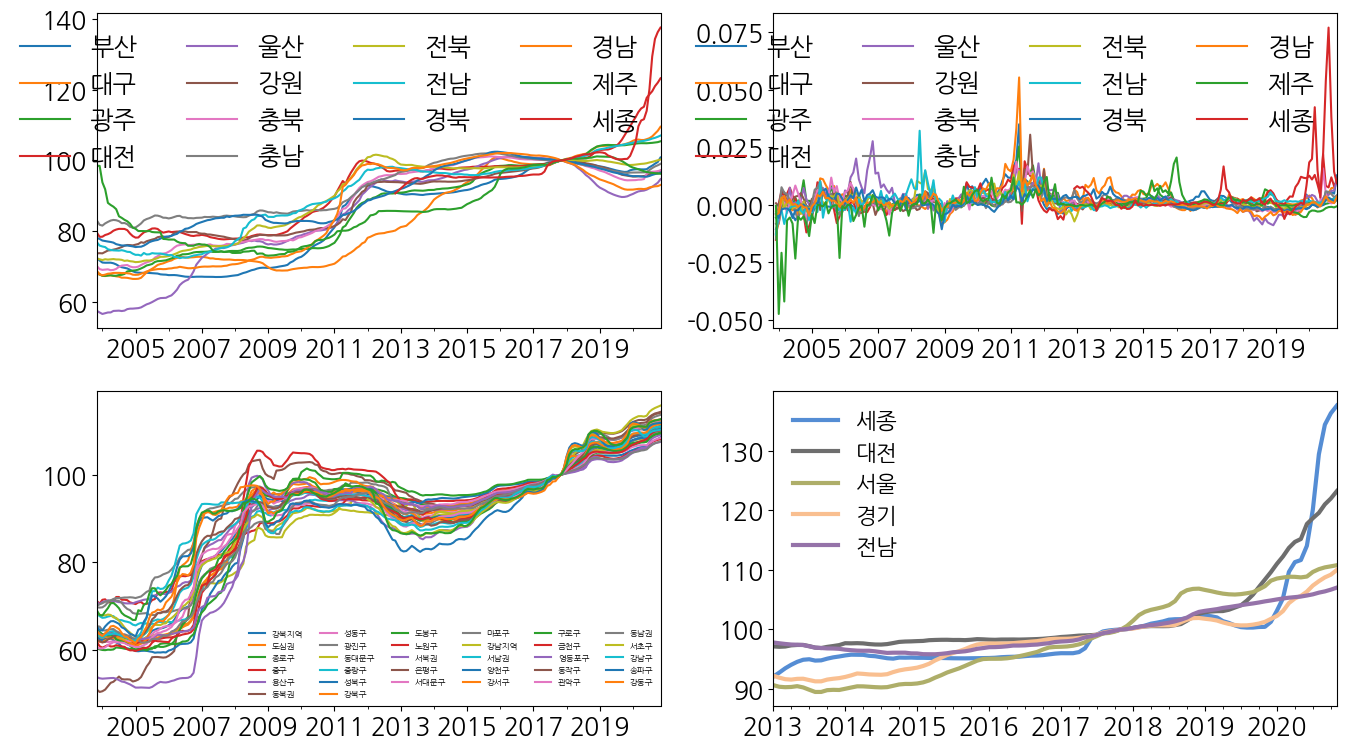

In [128]:
fig, ax = plt.subplots(2, 2, figsize=(16, 9))

df[nsm].plot(ax=ax[0, 0])
ax[0,0].legend(ncol=4, frameon=False)

df[nsm].pct_change().plot(ax=ax[0, 1])
ax[0,1].legend(ncol=4, frameon=False)

df.filter(like='서울').plot(ax=ax[1, 0])
seoul = df.filter(like='서울-').columns
legend = [j for i,j in seoul.str.split('-').tolist()]
ax[1,0].legend(legend, ncol=6, frameon=False, fontsize=6)

df.loc['2013':, big5].plot(ax=ax[1, 1], lw=3, color=lcolors)
ax[1,1].legend(ncol=1, frameon=False, fontsize=16)

# ECOS open API
- https://ecos.bok.or.kr/api/#/
- 회원가입 후, '서비스 이용 - 인증키 신청'
    - 아래 url에서 your_auth_key 부분을 인증키로 대체
- '개발 가이드 - 언어별 개발 가이드 - 파이썬' 참고
- '개발 가이드 - 통계코드검색'에서 원하는 통계항목의 코드 검색

'1.1.1.1.1. 본원통화 구성내역(평잔, 계절조정계열)'

- 인증키를 이용하여 2010년부터 2020년까지, 10,000개 이내 자료를 국문 json 파일 형식으로 입수하기 위한 url 주소 생성

ecos open api웹페이지에서 인증키 복사

In [50]:
your_auth_key = "xxxxxxxxxxxx"

In [51]:
your_auth_key = "9VLJ7SA4HWP47YS4O04U"

In [52]:
url = f'http://ecos.bok.or.kr/api/StatisticSearch/{your_auth_key}/json/kr/1/10000/102Y004/A/2010/2100/ABA1/?/?/'

In [53]:
import json
from urllib.request import urlopen

result = urlopen(url)
data = json.loads(result.read())

In [54]:
type(data)

dict

In [55]:
data.keys()

dict_keys(['StatisticSearch'])

In [56]:
data = data['StatisticSearch']

In [57]:
data.keys()

dict_keys(['list_total_count', 'row'])

In [58]:
data['list_total_count']

14

In [59]:
data['row']

[{'STAT_CODE': '102Y004',
  'STAT_NAME': '1.1.1.1.1. 본원통화 구성내역(평잔, 계절조정계열)',
  'ITEM_CODE1': 'ABA1',
  'ITEM_NAME1': '본원통화(평잔,계절조정계열)',
  'ITEM_CODE2': None,
  'ITEM_NAME2': None,
  'ITEM_CODE3': None,
  'ITEM_NAME3': None,
  'ITEM_CODE4': None,
  'ITEM_NAME4': None,
  'UNIT_NAME': '십억원 ',
  'WGT': None,
  'TIME': '2010',
  'DATA_VALUE': '67585.1'},
 {'STAT_CODE': '102Y004',
  'STAT_NAME': '1.1.1.1.1. 본원통화 구성내역(평잔, 계절조정계열)',
  'ITEM_CODE1': 'ABA1',
  'ITEM_NAME1': '본원통화(평잔,계절조정계열)',
  'ITEM_CODE2': None,
  'ITEM_NAME2': None,
  'ITEM_CODE3': None,
  'ITEM_NAME3': None,
  'ITEM_CODE4': None,
  'ITEM_NAME4': None,
  'UNIT_NAME': '십억원 ',
  'WGT': None,
  'TIME': '2011',
  'DATA_VALUE': '75232'},
 {'STAT_CODE': '102Y004',
  'STAT_NAME': '1.1.1.1.1. 본원통화 구성내역(평잔, 계절조정계열)',
  'ITEM_CODE1': 'ABA1',
  'ITEM_NAME1': '본원통화(평잔,계절조정계열)',
  'ITEM_CODE2': None,
  'ITEM_NAME2': None,
  'ITEM_CODE3': None,
  'ITEM_NAME3': None,
  'ITEM_CODE4': None,
  'ITEM_NAME4': None,
  'UNIT_NAME': '십억원 ',
  'WGT'

In [60]:
data = data['row']

딕셔너리 데이터를 이용하여 판다스 데이터프레임 생성

In [61]:
import pandas as pd

df = pd.DataFrame(data)

In [62]:
from pandas.tseries.offsets import YearEnd, QuarterEnd, MonthEnd, YearBegin, QuarterBegin, MonthBegin
import json
from urllib.request import urlopen
import pandas as pd


def necos(code = '102Y004', item1 = 'ABA1', item2 = '?', item3 = '?',
         freq = 'A', first = None, last = None, N = '10000',
         detail = True, col = None):

    if first is None:
        if (freq == 'M'):
            first = '190001'
            last = '210012'
        elif (freq == 'Q'):
            first = '1900Q1'
            last = '2100Q4'
        elif (freq == 'A'):
            first = '1900'
            last = '2100'
        elif (freq == 'D'):
            first = '20200101'
            last = '20301231'
            print('Data is being retreived from 2020-01-01.')
        else:
            print('freq must be one of D, M, Q, A.')
            return

    '''retreive monthly, quarterly, annul time series from ecos.
    run 'open_ecosapi() to explore ecos api codes.'''
    ecos_key = f"http://ecos.bok.or.kr/api/StatisticSearch/{your_auth_key}"

    url  = f"{ecos_key}/json/kr/1/{N}/{code}/{freq}/{first}/{last}/{item1}/{item2}/{item3}/"
    result = urlopen(url)
    data = json.loads(result.read())
    data = data["StatisticSearch"]["row"]
    df = pd.DataFrame(data)

    if detail:
        print(f"통계: {df.loc[0, 'STAT_NAME']}",
            f"단위: {df.loc[0, 'UNIT_NAME']}",
            f"기간: {df.loc[0, 'TIME']} - {df.loc[df.index[-1], 'TIME']}",
            f"항목: {df.loc[0, 'ITEM_NAME1']}",)

    df = df.set_index("TIME")
    df.index.names = ['DATE']

    if (freq == 'M'):
        df.index = pd.to_datetime(df.index, format='%Y%m')
    elif (freq == 'Q'):
        df.index = pd.to_datetime(df.index)
    elif (freq == 'A'):
        df.index = pd.to_datetime(df.index, format='%Y')
    elif (freq == 'D'):
        df.index = pd.to_datetime(df.index, format='%Y%m%d')

    df["DATA_VALUE"] = df["DATA_VALUE"].astype("float")

    return df['DATA_VALUE'].to_frame(col)

In [63]:
cash = necos('102Y001', 'ABA203', freq='M', col = 'cash')

통계: 1.1.1.1.4. 본원통화 구성내역(말잔, 원계열) 단위: 십억원  기간: 200201 - 202403 항목: 현금통화


In [64]:
cash

cash
DATE                
2002-01-01   16376.8
2002-02-01   17389.5
2002-03-01   17109.0
2002-04-01   16836.6
2002-05-01   16652.6
...              ...
2023-11-01  168221.4
2023-12-01  170324.0
2024-01-01  171410.1
2024-02-01  173341.7
2024-03-01  173576.4

[267 rows x 1 columns]

In [65]:
plt.rcParams['axes.unicode_minus'] = False

<Axes: xlabel='DATE'>

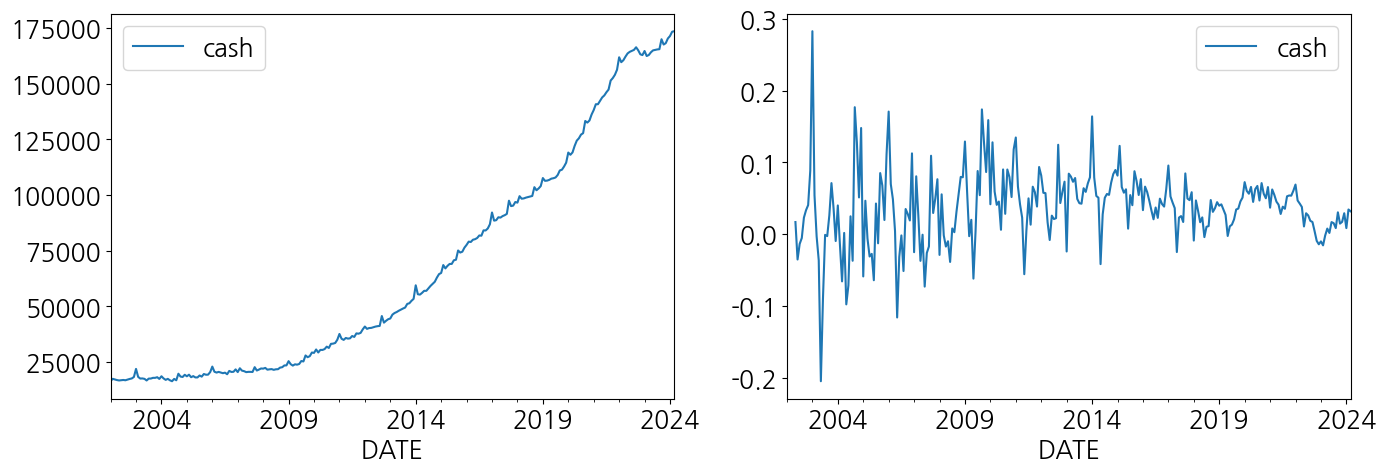

In [66]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(16, 5))

cash.plot(ax=ax[0])
cash.pct_change(4).plot(ax=ax[1])



In [67]:
!pip install PublicDataReader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 7.5 MB/s eta 0:00:00


In [68]:
from PublicDataReader import Ecos
service_key = "9VLJ7SA4HWP47YS4O04U"
api = Ecos(service_key)
df = api.get_statistic_word(용어="소비자동향지수")
df.head()

용어                                               용어설명
0  소비자동향지수  소비자들이 느끼는 경기, 소비지출계획, 생활형편 등 경제에 대한 전반적인 인식을 조...

In [69]:
import PublicDataReader

In [70]:
dir(api)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'base_url',
 'get_key_statistic_list',
 'get_statistic_item_list',
 'get_statistic_meta',
 'get_statistic_search',
 'get_statistic_table_list',
 'get_statistic_word',
 'service_key',
 'translate']

In [71]:
from PublicDataReader import Ecos
service_key = "9VLJ7SA4HWP47YS4O04U"
api = Ecos(service_key)
df = api.get_statistic_table_list()
df.head()

상위통계표코드       통계표코드                               통계명    시점 검색가능여부    출처
0           *  0000000001                          1. 통화/금융  None      N  None
1  0000000001  0000000002                       1.1. 통화/유동성  None      N  None
2  0000000002  0000000003                       1.1.1. 본원통화  None      N  None
3  0000000003  0000000004                1.1.1.1. 본원통화 구성내역  None      N  None
4  0000000004     102Y004  1.1.1.1.1. 본원통화 구성내역(평잔, 계절조정계열)     M      Y  None

In [72]:
df.loc[df['통계명'].str.contains('부동산')]

상위통계표코드       통계표코드            통계명    시점 검색가능여부    출처
582  0000000202  0000000224  4.4. 부동산 가격지수  None      N  None

In [73]:
df.loc[df['통계명'].str.contains('뉴스심리지수')]

상위통계표코드    통계표코드                  통계명 시점 검색가능여부    출처
747  0000000283  521Y001  6.4. 뉴스심리지수(실험적 통계)  D      Y  None

In [74]:
from PublicDataReader import Ecos
service_key = "9VLJ7SA4HWP47YS4O04U"
api = Ecos(service_key)
df = api.get_statistic_item_list(통계표코드="102Y004")
df.head()

통계표코드                               통계명  항목그룹코드 항목그룹명  통계항목코드  \
0  102Y004  1.1.1.1.1. 본원통화 구성내역(평잔, 계절조정계열)  Group1  계정항목    ABA1   
1  102Y004  1.1.1.1.1. 본원통화 구성내역(평잔, 계절조정계열)  Group1  계정항목    ABA1   
2  102Y004  1.1.1.1.1. 본원통화 구성내역(평잔, 계절조정계열)  Group1  계정항목  ABA104   
3  102Y004  1.1.1.1.1. 본원통화 구성내역(평잔, 계절조정계열)  Group1  계정항목  ABA104   
4  102Y004  1.1.1.1.1. 본원통화 구성내역(평잔, 계절조정계열)  Group1  계정항목  ABA103   

             통계항목명 상위통계항목코드          상위통계항목명 시점  수록시작일자  수록종료일자  자료수    단위  \
0  본원통화(평잔,계절조정계열)     None             None  A    2002    2023   22  십억원    
1  본원통화(평잔,계절조정계열)     None             None  M  200112  202403  268  십억원    
2             현금통화     ABA1  본원통화(평잔,계절조정계열)  A    2002    2023   22  십억원    
3             현금통화     ABA1  본원통화(평잔,계절조정계열)  M  200112  202403  268  십억원    
4  중앙은행 대 예금취급기관부채     ABA1  본원통화(평잔,계절조정계열)  A    2002    2023   22  십억원    

    가중치  
0  None  
1  None  
2  None  
3  None  
4  None

In [75]:
from PublicDataReader import Ecos
service_key = "9VLJ7SA4HWP47YS4O04U"
api = Ecos(service_key)
df = api.get_statistic_search(통계표코드="521Y001", 주기="D", 검색시작일자="20150102", 검색종료일자="20210102")
df.head()

통계표코드                  통계명 통계항목코드1  통계항목명1 통계항목코드2 통계항목명2 통계항목코드3 통계항목명3  \
0  521Y001  6.4. 뉴스심리지수(실험적 통계)    A001  뉴스심리지수    None   None    None   None   
1  521Y001  6.4. 뉴스심리지수(실험적 통계)    A001  뉴스심리지수    None   None    None   None   
2  521Y001  6.4. 뉴스심리지수(실험적 통계)    A001  뉴스심리지수    None   None    None   None   
3  521Y001  6.4. 뉴스심리지수(실험적 통계)    A001  뉴스심리지수    None   None    None   None   
4  521Y001  6.4. 뉴스심리지수(실험적 통계)    A001  뉴스심리지수    None   None    None   None   

  통계항목코드4 통계항목명4    단위   WGT        시점      값  
0    None   None  None  None  20150102  94.22  
1    None   None  None  None  20150103  96.75  
2    None   None  None  None  20150104  96.97  
3    None   None  None  None  20150105  98.48  
4    None   None  None  None  20150106  98.26

In [76]:
df['값'] = df['값'].astype(float)

In [77]:
df['시점'] = pd.to_datetime(df['시점'])

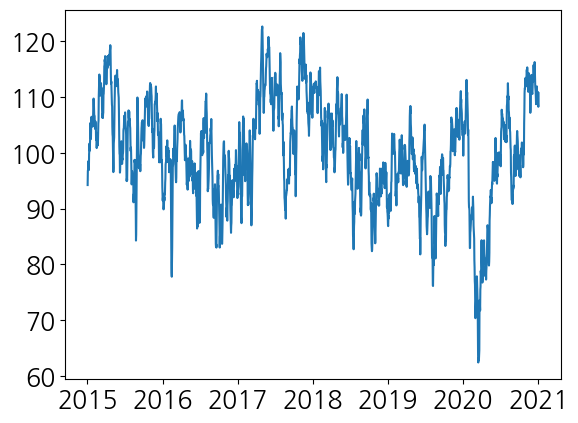

In [78]:
import matplotlib.pyplot as plt

plt.plot(df['시점'], df['값'])
plt.show()

In [79]:
from PublicDataReader import Ecos
service_key = "9VLJ7SA4HWP47YS4O04U"
api = Ecos(service_key)
df = api.get_statistic_item_list(통계표코드="601Y002")
df.head()

통계표코드                       통계명  항목그룹코드 항목그룹명 통계항목코드 통계항목명 상위통계항목코드  \
0  601Y002  7.5.2. 지역별 소비유형별 개인 신용카드  Group1  지역코드      A    서울     None   
1  601Y002  7.5.2. 지역별 소비유형별 개인 신용카드  Group1  지역코드      B    부산     None   
2  601Y002  7.5.2. 지역별 소비유형별 개인 신용카드  Group1  지역코드      C    대구     None   
3  601Y002  7.5.2. 지역별 소비유형별 개인 신용카드  Group1  지역코드      D    인천     None   
4  601Y002  7.5.2. 지역별 소비유형별 개인 신용카드  Group1  지역코드      E    광주     None   

  상위통계항목명 시점  수록시작일자  수록종료일자    자료수    단위   가중치  
0    None  M  200912  202308  13530  None  None  
1    None  M  200912  202308  13530  None  None  
2    None  M  200912  202308  13530  None  None  
3    None  M  200912  202308  13530  None  None  
4    None  M  200912  202308  13530  None  None

In [80]:
from PublicDataReader import Ecos
service_key = "9VLJ7SA4HWP47YS4O04U"
api = Ecos(service_key)
df = api.get_statistic_search(통계표코드="200Y001", 주기="A", 검색시작일자="2015", 검색종료일자="2021")
df.head()

통계표코드                  통계명  통계항목코드1           통계항목명1 통계항목코드2 통계항목명2  \
0  200Y001  2.7.1.1. 주요지표(연간지표)    10101  국내총생산(명목, 원화표시)    None   None   
1  200Y001  2.7.1.1. 주요지표(연간지표)  1010101  국내총생산(명목, 달러표시)    None   None   
2  200Y001  2.7.1.1. 주요지표(연간지표)    10102  국민총소득(명목, 원화표시)    None   None   
3  200Y001  2.7.1.1. 주요지표(연간지표)  1010201  국민총소득(명목, 달러표시)    None   None   
4  200Y001  2.7.1.1. 주요지표(연간지표)    10103     요소비용국민소득(명목)    None   None   

  통계항목코드3 통계항목명3 통계항목코드4 통계항목명4    단위   WGT    시점          값  
0    None   None    None   None  십억원   None  2015  1658020.4  
1    None   None    None   None  억달러   None  2015    14653.4  
2    None   None    None   None  십억원   None  2015  1663206.6  
3    None   None    None   None  억달러   None  2015    14699.3  
4    None   None    None   None  십억원   None  2015  1196864.4

In [81]:
from PublicDataReader import Ecos
service_key = "9VLJ7SA4HWP47YS4O04U"
api = Ecos(service_key)
df = api.get_key_statistic_list()
df.head()

통계그룹명            통계명      값        시점  단위
0  시장금리      한국은행 기준금리    3.5  20240610  % 
1  시장금리       콜금리(익일물)  3.591  20240611  % 
2  시장금리   KORIBOR(3개월)   3.59  20240612  % 
3  시장금리     CD수익률(91일)    3.6  20240612  % 
4  시장금리  통안증권수익률(364일)  3.365  20240612  %

In [82]:
from PublicDataReader import Ecos
service_key = "9VLJ7SA4HWP47YS4O04U"
api = Ecos(service_key)
df = api.get_statistic_meta(데이터명="경제심리지수")
df.head()

레벨    상위통계항목코드      통계항목코드     통계항목명   메타데이터
0  2  0000000108         N13     참고 자료    None
1  3         N13  0000000107  기타 참고 자료    None
2  1        None  0000000108        기타    None
3  1        None  0000000001      기본정보    None
4  4        N031  0000000002       통계명  경제심리지수

In [83]:
service_key = "GG0wuvzFVw1y560EYcTyzMmCSHdev0l47FAKkXP3DUkT9g3hd5wH%2Fi151qfWpxUFLPgDt%2FWHv9WNbAw7CGZhNA%3D%3D"
service_key = "GG0wuvzFVw1y560EYcTyzMmCSHdev0l47FAKkXP3DUkT9g3hd5wH/i151qfWpxUFLPgDt/WHv9WNbAw7CGZhNA=="

In [84]:
from PublicDataReader import TransactionPrice
api = TransactionPrice(service_key)

In [85]:
!pip install PublicDataReader --upgrade

In [86]:
import PublicDataReader as pdr
sigungu_name = "분당구"
code = pdr.code_bdong()
code.loc[(code['시군구명'].str.contains(sigungu_name)) &
         (code['읍면동명']=='')]

출처: 행정기관(행정동) 및 관할구역(법정동) 변경내역(2024.2.1. 시행)


시도코드  시도명  시군구코드     시군구명       법정동코드 읍면동명 동리명      생성일자 말소일자
5253   41  경기도  41135  성남시 분당구  4113500000           19910916

In [87]:
import requests
url = 'http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTrade'
params={'serviceKey': service_key, 'pageNo': '1', 'numOfRows': '10', 'LAWD_CD': '41450', 'DEAL_YMD': '202210'}

In [88]:
response = requests.get(url, params=params)

In [89]:
response.text

'<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultCode>00</resultCode><resultMsg>NORMAL SERVICE.</resultMsg></header><body><items><item><거래금액>      94,900</거래금액><거래유형>중개거래</거래유형><건축년도>2017</건축년도><년>2022</년><동> </동><등기일자> </등기일자><매도자> </매도자><매수자> </매수자><법정동> 신장동</법정동><아파트>하남유니온시티에일린의뜰</아파트><월>10</월><일>2</일><전용면적>84.99</전용면적><중개사소재지>경기 하남시</중개사소재지><지번>602</지번><지역코드>41450</지역코드><층>21</층><해제사유발생일> </해제사유발생일><해제여부> </해제여부></item><item><거래금액>      66,000</거래금액><거래유형>직거래</거래유형><건축년도>2018</건축년도><년>2022</년><동> </동><등기일자> </등기일자><매도자> </매도자><매수자> </매수자><법정동> 신장동</법정동><아파트>하남유시티대명루첸리버파크</아파트><월>10</월><일>27</일><전용면적>74.34</전용면적><중개사소재지> </중개사소재지><지번>593</지번><지역코드>41450</지역코드><층>23</층><해제사유발생일> </해제사유발생일><해제여부> </해제여부></item><item><거래금액>      15,950</거래금액><거래유형>중개거래</거래유형><건축년도>2005</건축년도><년>2022</년><동> </동><등기일자> </등기일자><매도자> </매도자><매수자> </매수자><법정동> 덕풍동</법정동><아파트>대동피렌체</아파트><월>10</월><일>13</일><전용면적>32.004</전용면적><중개사소재지>경기 하남시</중개사소재지><지번>372-2</지번><지역코드>41450</지역코드><층

In [90]:
from bs4 import BeautifulSoup as BS
soup = BS(response.text, 'xml')
item = soup.find('item')
print(item)

<item><거래금액>      94,900</거래금액><거래유형>중개거래</거래유형><건축년도>2017</건축년도><년>2022</년><동> </동><등기일자> </등기일자><매도자> </매도자><매수자> </매수자><법정동> 신장동</법정동><아파트>하남유니온시티에일린의뜰</아파트><월>10</월><일>2</일><전용면적>84.99</전용면적><중개사소재지>경기 하남시</중개사소재지><지번>602</지번><지역코드>41450</지역코드><층>21</층><해제사유발생일> </해제사유발생일><해제여부> </해제여부></item>


In [91]:
# 특정 년월 자료만 조회하기
df = api.get_data(
    property_type="아파트",
    trade_type="매매",
    sigungu_code="41135",
    year_month="202212",
    )
df.tail()

Exception: SERVICE ACCESS DENIED ERROR.

In [ ]:
# 특정 기간 자료 조회하기
df = api.get_data(
    property_type="아파트",
    trade_type="매매",
    sigungu_code="41135",
    start_year_month="202212",
    end_year_month="202301",
    )
df.tail()